In [55]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

pd.set_option('display.max_rows', None)

In [3]:
data_path = os.path.expanduser("~/Downloads/tl_2021_us_state.zip")

In [4]:
states = gpd.read_file(data_path)

In [66]:
ohio = (
    states
    .loc[states['NAME'] == 'Ohio']
)

california = (
    states
    .loc[states['NAME'] == 'California']
)

texas = (
    states
    .loc[states['NAME'] == 'Texas']
)

In [72]:
cinnci = Point(-84.5120, 39.1031)
cleveland = Point(-81.6944, 41.4993)
columbus = Point(-82.9988, 39.9612)

houston = Point(-95.3698, 29.7604)
dallas = Point(-96.7970, 32.7767)
san_antonio = Point(-98.4946, 29.4252)



ohio_geoms = [cinnci, cleveland, columbus]
texas_geoms = [houston, dallas, san_antonio]

ohio_cities = (
    gpd.GeoDataFrame(
        {'city': ['Cinncinatti', 'Cleveland', 'Columbus'], 'label': ['A', 'B', 'C']}, 
        geometry=ohio_geoms
    )
    .assign(answer=lambda df_: df_['label'] + ': ' + df_['city'])
)

texas_cities = (
    gpd.GeoDataFrame(
        {'city': ['Houston', 'Dallas', 'San Antonio'], 'label': ['A', 'B', 'C']}, 
        geometry=texas_geoms
    )
    .assign(answer=lambda df_: df_['label'] + ': ' + df_['city'])
)

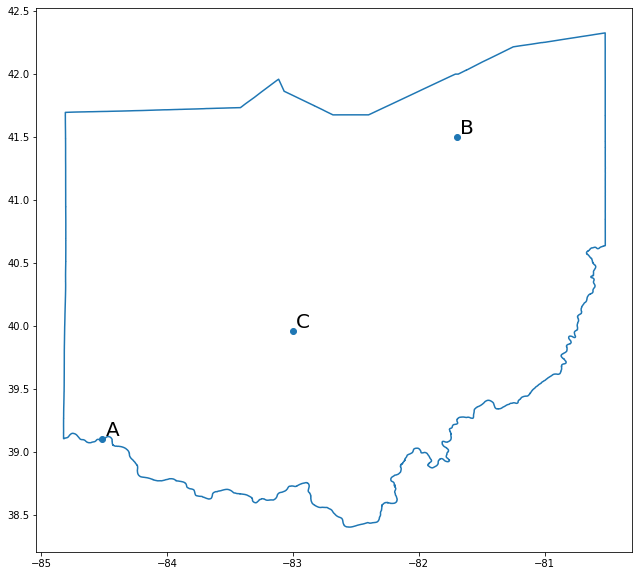

In [70]:
ax = ohio.boundary.plot(figsize=(14, 10))
ohio_cities.plot(ax=ax)

for x, y, label in zip(ohio_cities.geometry.x, ohio_cities.geometry.y, ohio_cities.label):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=20)

plt.show()

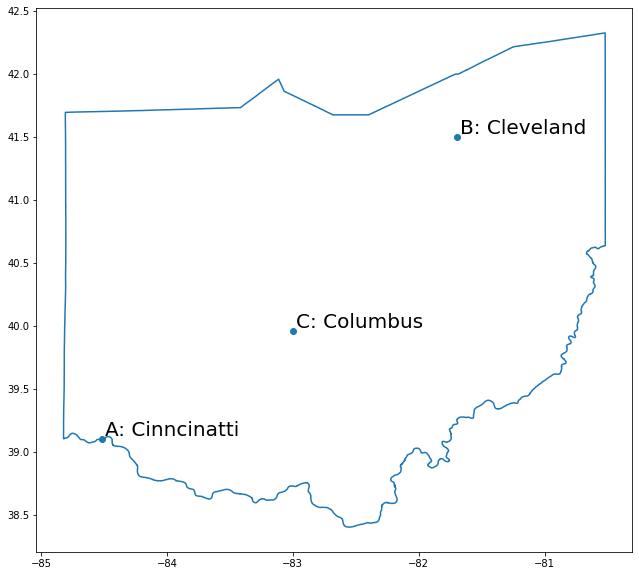

In [73]:
ax = ohio.boundary.plot(figsize=(14, 10))
ohio_cities.plot(ax=ax)

for x, y, label in zip(ohio_cities.geometry.x, ohio_cities.geometry.y, ohio_cities.answer):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=20)

plt.show()

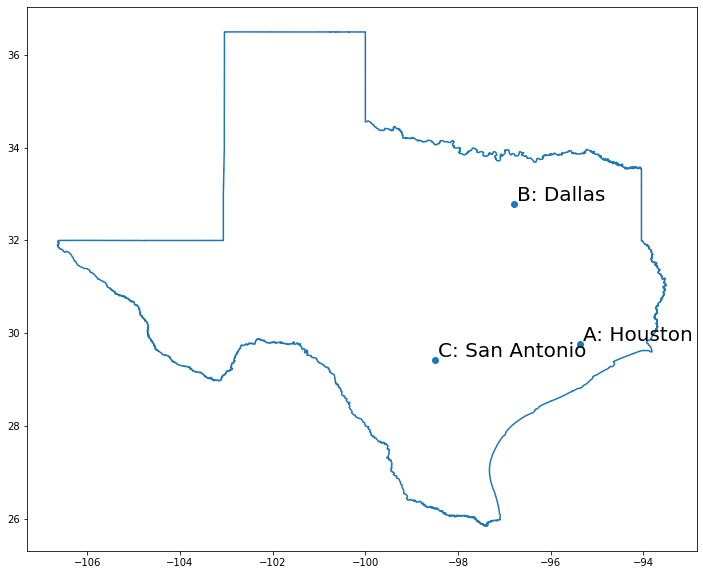

In [74]:
ax = texas.boundary.plot(figsize=(14, 10))
texas_cities.plot(ax=ax)

for x, y, label in zip(texas_cities.geometry.x, texas_cities.geometry.y, texas_cities.answer):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=20)

plt.show()

In [ ]:
ax = california.boundary.plot(figsize=(14, 10))
california_cities.plot(ax=ax)

for x, y, label in zip(california_cities.geometry.x, california_cities.geometry.y, california_cities.label):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=20)

plt.show()

In [15]:
df = pd.read_csv("/home/buchmayne/Downloads/ACSDP1Y2021.DP03-Data.csv", skiprows=1)

/home/buchmayne/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,274,275,276,277,342,343,344,345,378,379,380,381,382,383,384,385,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,750,751,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,802,803,804,805,810,811,812,813,818,819,820,821,826,827,828,829,834,835,836,837,842,843,844,845,926,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943

In [27]:
keep = [
    'Geographic Area Name',
    'Estimate!!COMMUTING TO WORK!!Workers 16 years and over',
    'Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Worked from home'
]

In [62]:
cities = [
    'Portland',
    'Seattle',
    'Los Angeles',
    'San Francsico',
    'Austin',
    'Houston',
    'Denver',
    'Miami',
    'Boston',
    'Chicago'
]

(
    df
    [keep]
    .rename(columns={
        'Geographic Area Name': 'geography',
        'Estimate!!COMMUTING TO WORK!!Workers 16 years and over': 'workers',
        'Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Worked from home': 'wfh'
    })
    .assign(
        workers=lambda df_: pd.to_numeric(df_['workers'], errors='coerce'),
        wfh=lambda df_: pd.to_numeric(df_['wfh'], errors='coerce')
    )
    .dropna()
    .assign(pct_wfh=lambda df_: df_['wfh'] / df_['workers'])
    [['geography', 'pct_wfh']]
    .pipe(lambda df_:
         pd.concat([df_, df_['geography'].str.split(',', expand=True)], axis=1)
         )
    .rename(columns={0: 'city', 1: 'state'})
    .reset_index(drop=True)
    .assign(state=lambda df_: df_['state'].str.strip())
    .sort_values('pct_wfh', ascending=False)
    .drop_duplicates()
    .assign(city=lambda df_: df_['city'].str.replace(' city$', '', regex=True))
    .loc[lambda df_: df_['city'].isin(cities)]
    
)

,geography,pct_wfh,city,state
575,"Seattle city, Washington",0.468086,Seattle,Washington
492,"Austin city, Texas",0.387754,Austin,Texas
1058,"Portland city, Oregon",0.348797,Portland,Oregon
180,"Denver city, Colorado",0.322881,Denver,Colorado
926,"Boston city, Massachusetts",0.303146,Boston,Massachusetts
317,"Portland city, Maine",0.272261,Portland,Maine
270,"Chicago city, Illinois",0.270825,Chicago,Illinois
690,"Los Angeles city, California",0.238258,Los Angeles,California
227,"Miami city, Florida",0.183542,Miami,Florida
1108,"Houston city, Texas",0.156454,Houston,Texas
